In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Figuras destinadas al capítulo del modelado de conductor

In [6]:
%matplotlib inline

import glob

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('thesis')

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

In [7]:
SUBJECTS = 'all',  # 'miguel', 'edgar', 'jj'
STAGES = 'training', 'validation', 'test'

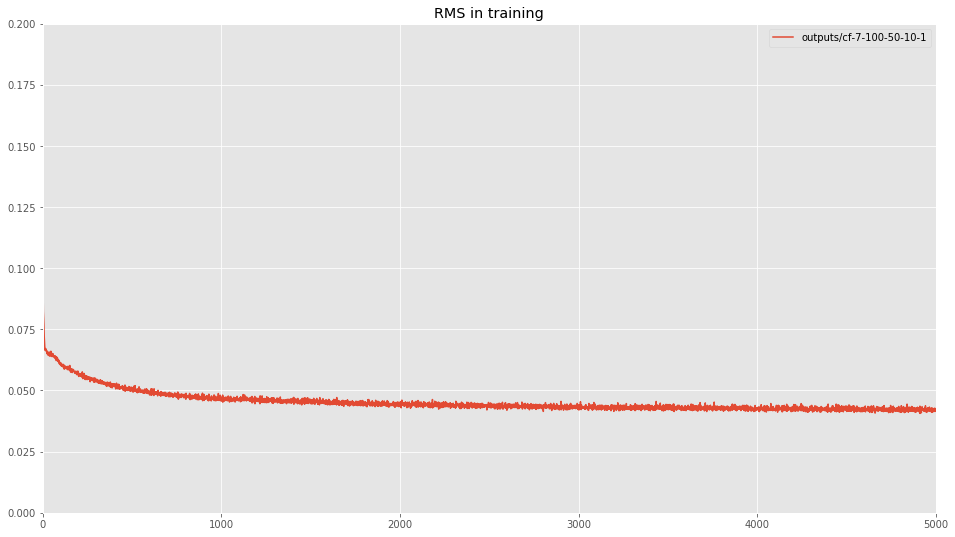

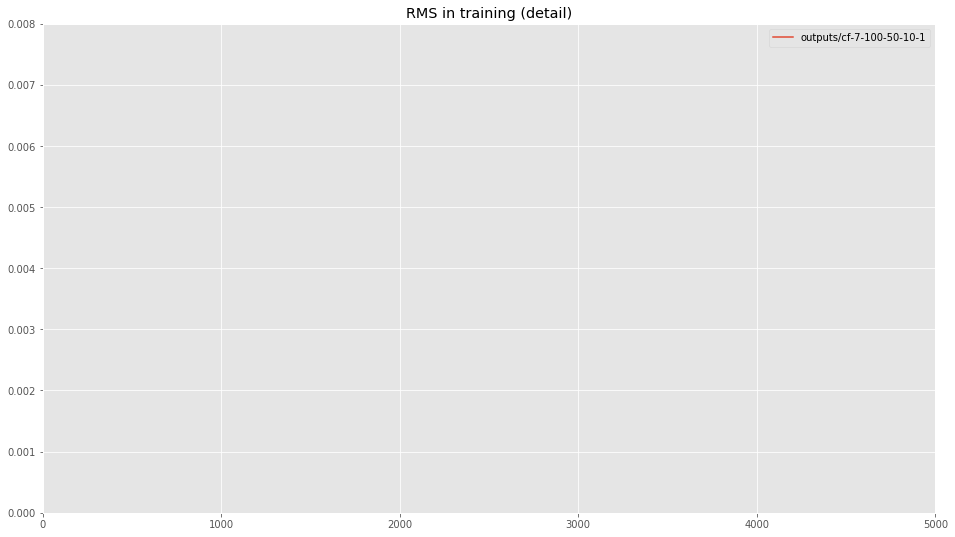

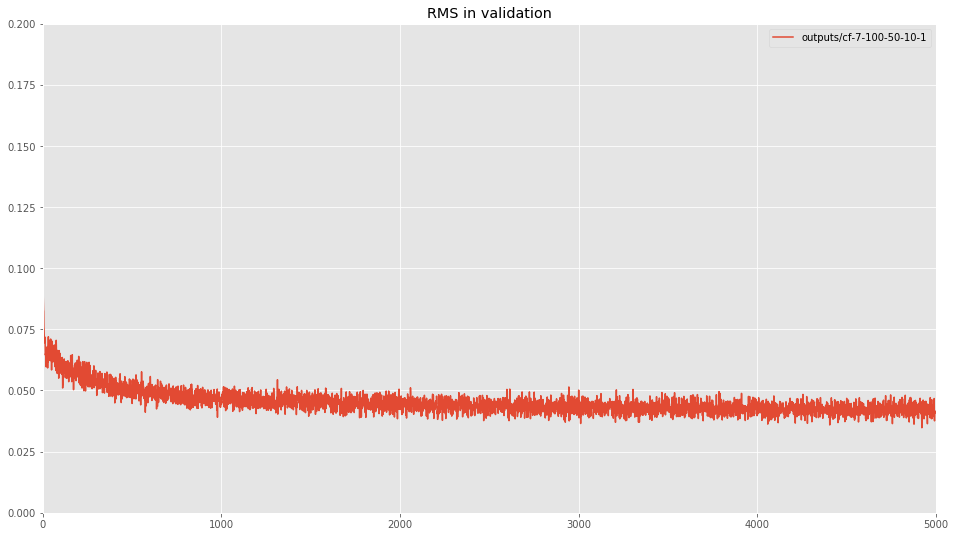

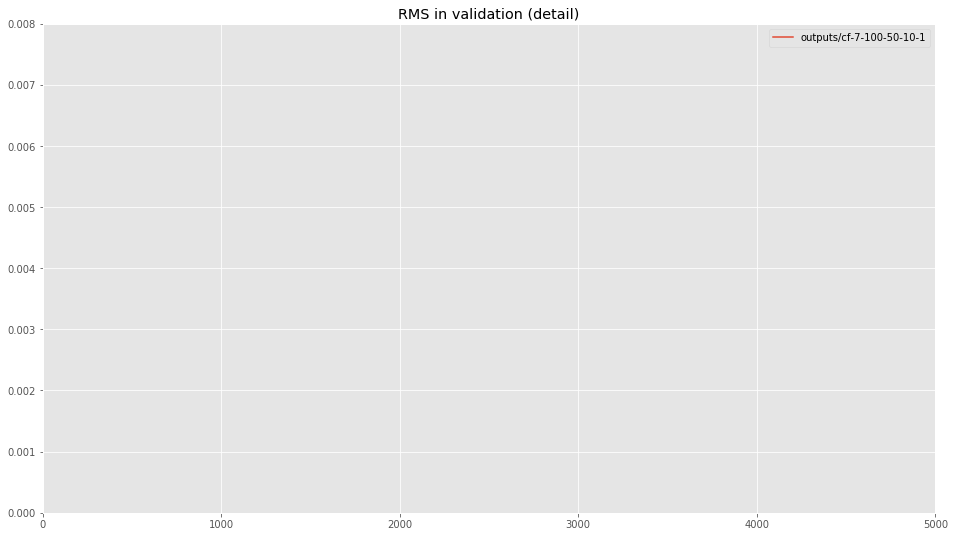

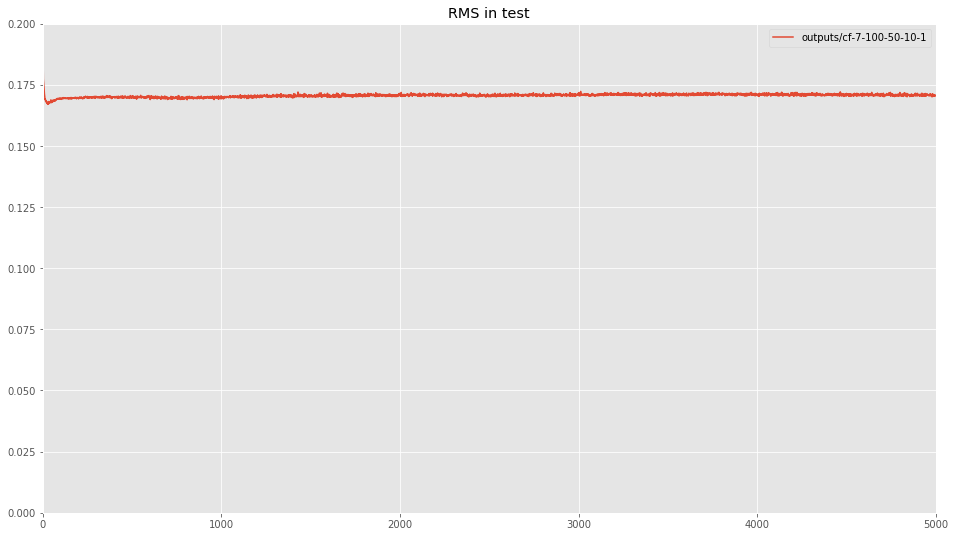

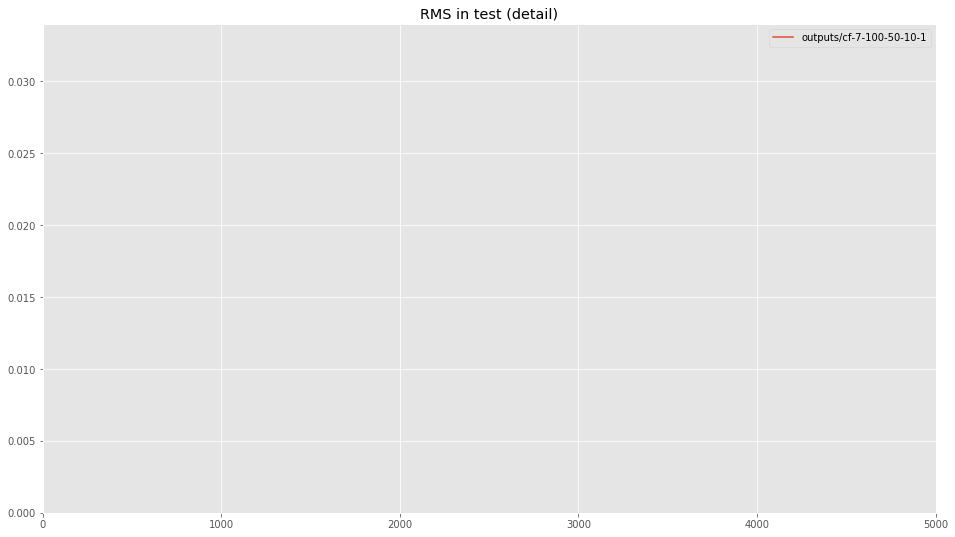

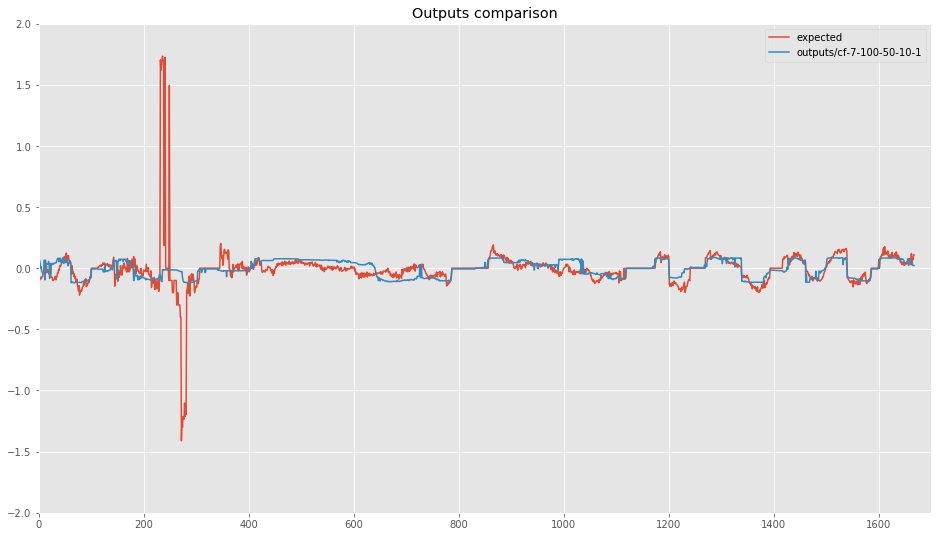

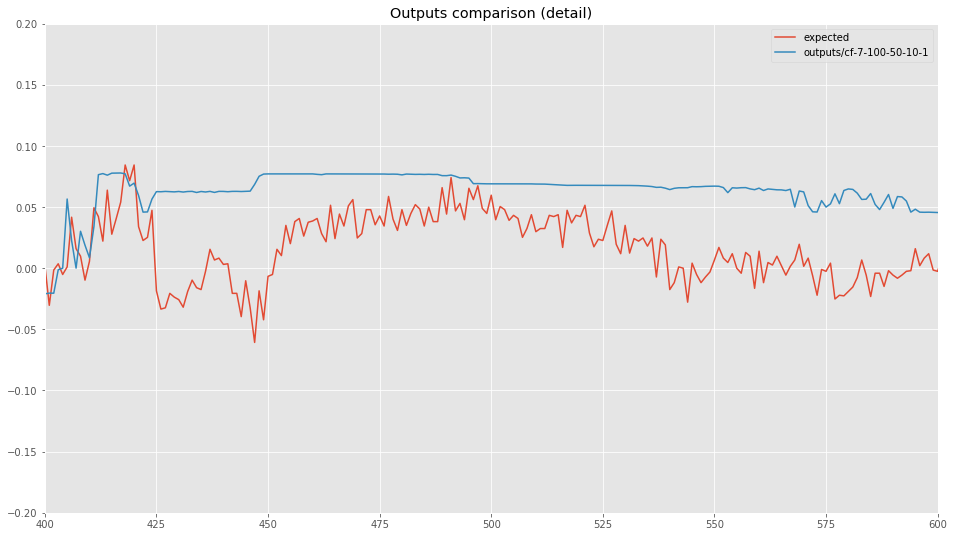

In [13]:
CONFIG = {
    'all': {
        'x_lim': (0, 5000),
        'training': {
            'title': 'RMS in training',
            'title_detail': 'RMS in training (detail)',
            'y_lim': (0, 0.2),
            'y_lim_detail': (0, 0.008),
        },
        'validation': {
            'title': 'RMS in validation',
            'title_detail': 'RMS in validation (detail)',
            'y_lim': (0, 0.2),
            'y_lim_detail': (0, 0.008),
        },
        'test': {
            'title': 'RMS in test',
            'title_detail': 'RMS in test (detail)',
            'y_lim': (0, 0.2),
            'y_lim_detail': (0, 0.034),
        },
        'outputs': {
            'title': 'Outputs comparison',
            'title_detail': 'Outputs comparison (detail)',
            'x_lim': (0, 1700),
            'x_lim_detail': (400, 600),
            'y_lim': (-2, 2),
            'y_lim_detail': (-0.2, 0.2),
        },
    },
}

for subject in SUBJECTS:
    rms_files = sorted([f for f in glob.glob('outputs/cf-mlp-rms-{}-*.csv'.format(subject))], key=lambda x: (len(x), x))
    out_files = sorted([f for f in glob.glob('outputs/cf-mlp-outputs-{}-*.csv'.format(subject))], key=lambda x: (len(x), x))
    architectures = [s.replace('.csv', '').replace('mlp-rms-{}-'.format(subject), '') for s in rms_files]
    rms_dfs = [pd.read_csv(f, index_col=None) for f in rms_files]
    out_dfs = [pd.read_csv(f, index_col=None) for f in out_files]

    # General
    for stage in STAGES:
        # General RMS comparison
        fig, ax = plt.subplots(1, 1)
        ax.set_title(CONFIG[subject][stage]['title'])
        ax.set_xlim(*CONFIG[subject]['x_lim'])
        ax.set_ylim(*CONFIG[subject][stage]['y_lim'])
        stage_df = pd.DataFrame()
        for architecture, df in zip(architectures, rms_dfs):
            stage_df[architecture] = df[stage]
        stage_df.plot(ax=ax)
        fig.savefig('../report/figures/mlp-{}-{}.pdf'.format(subject, stage), bbox_inches='tight')        
        
        # Detail RMS comparison
        fig, ax = plt.subplots(1, 1)
        ax.set_title(CONFIG[subject][stage]['title_detail'])
        ax.set_xlim(*CONFIG[subject]['x_lim'])
        ax.set_ylim(*CONFIG[subject][stage]['y_lim_detail'])
        stage_df = pd.DataFrame()
        for architecture, df in zip(architectures, rms_dfs):
            stage_df[architecture] = df[stage]
        stage_df.rolling(window=10, min_periods=1).mean().plot(ax=ax)
        fig.savefig('../report/figures/mlp-{}-{}-detail.pdf'.format(subject, stage), bbox_inches='tight')        

    outs_df = pd.DataFrame()
    outs_df['expected'] = out_dfs[0]['expected']
    for architecture, df in zip(architectures, out_dfs):
        outs_df[architecture] = df['real']
    #outs_df.sort_values(by='expected', inplace=True)
    #outs_df.reset_index(inplace=True, drop=True)
    # General
    fig, ax = plt.subplots(1, 1)
    ax.set_title(CONFIG[subject]['outputs']['title'])
    ax.set_xlim(*CONFIG[subject]['outputs']['x_lim'])
    ax.set_ylim(*CONFIG[subject]['outputs']['y_lim'])
    outs_df.plot(ax=ax)
    fig.savefig('../report/figures/mlp-test-comparison.pdf'.format(subject, stage), bbox_inches='tight')        
    
    # Detail
    fig, ax = plt.subplots(1, 1)
    ax.set_title(CONFIG[subject]['outputs']['title_detail'])
    ax.set_xlim(*CONFIG[subject]['outputs']['x_lim_detail'])
    ax.set_ylim(*CONFIG[subject]['outputs']['y_lim_detail'])
    outs_df.plot(ax=ax)
    fig.savefig('../report/figures/mlp-test-comparison-detail.pdf'.format(subject, stage), bbox_inches='tight')        